**Notes to Original Images Results:**

* Models exceeding no info baseline:
* Severe over-fitting with XGBoost, but not so with LightGBM. Still not particular good performance from LightGBM.


**Notes to Removed Broken Slices Results:**

* Models exceeding no info baseline:
* Severe over-fitting with LightGBM & XGBoost. May be too complex models applied to too little data. Optimization algorithm incapable of regularizing in each experiment.

In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

%matplotlib inline

In [2]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

In [3]:
def print_params(model, estimator_name):
    
    for var_label in list(model.filter(regex=estimator_name).columns):
        var = np.copy(model[f'{var_label}'])
        try:
            var[np.where(np.isnan(var))] = -1
        except:
            pass
        print(var_label.split('__')[1])
        print('-' * 60)
        print(Counter(var))
        print('-' * 60)
        print('\n')

In [4]:
results = pd.read_csv(
    './../../data_source/results/original_images/results_all_features_original_images.csv',
    index_col=0
)
#results = pd.read_csv(
#    './../../data_source/results/removed_broken_slices/results_all_features_removed_broken_slices.csv',
#    index_col=0
#)

In [5]:
#list(np.unique(orig_results['experiment_id'].values))

# Fisher Score & LightGBM

In [18]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'LightGBM'
fisher_gbm = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

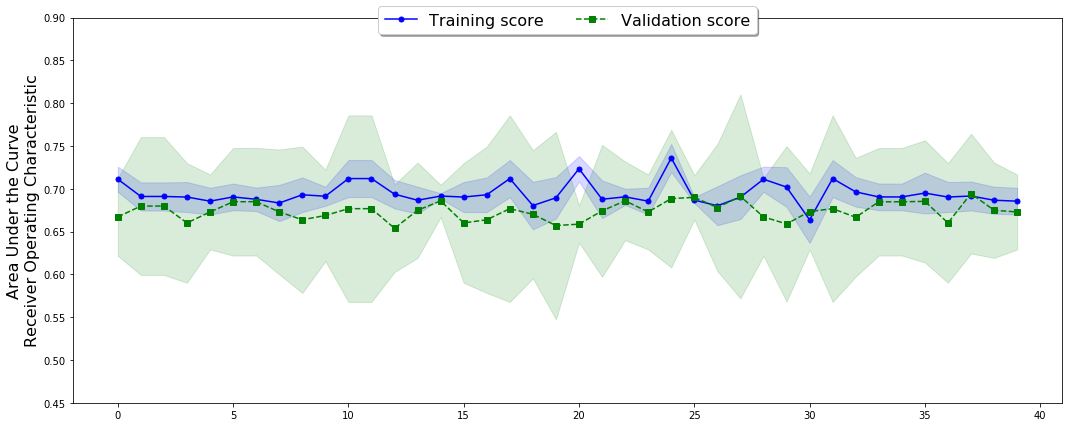

In [19]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_gbm, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [20]:
for var_label in list(fisher_gbm.filter(regex=estimator_name).columns):
    var = np.copy(fisher_gbm[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({4.293032567758866: 4, 4.125493560356598: 3, 41.763659988097245: 3, 2.1506902619602744: 3, 3.5831263614119706: 2, 3.486658659058696: 2, 1.4520806991640316: 2, 3.7818981056766288: 2, 16.903220651956655: 1, 15.50514795426946: 1, 3.4253368846989067: 1, 2.6276738691759: 1, 2.3117835310941253: 1, 48.22690914472853: 1, 11.850078111596638: 1, 3.9220907763378143: 1, 15.639456317607117: 1, 2.1081823086903966: 1, 7.486806875179798: 1, 20.317903804448022: 1, 45.825654198724145: 1, 16.513498356482938: 1, 12.947931308166456: 1, 38.00114050518821: 1, 6.940545933740414: 1, 1.846827392610377: 1, 8.414171751779916: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({200.0: 4, 488.0: 3, 96.0: 3, 359.0: 3, 255.0: 2, 284.0: 2, 90.0: 2, 494.0: 2, 342.0: 2, 204.0: 1, 21.0: 1, 74.0: 1, 378.0: 1, 316.0: 1, 263.0: 1, 320.0: 1, 233.0: 1

Text(0.5, 0, 'Experimet')

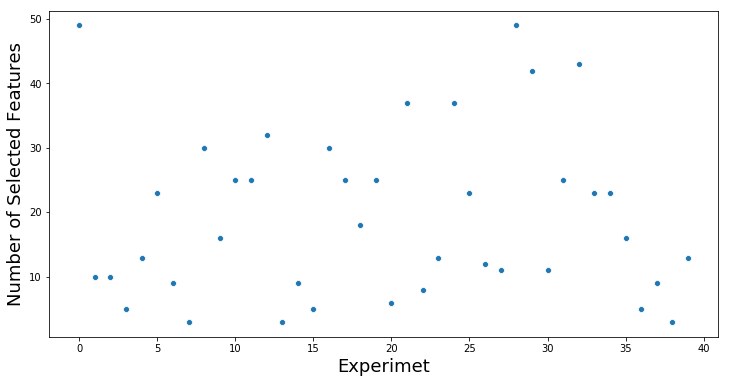

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    np.arange(fisher_gbm['FisherScoreSelection__num_features'].size),
    fisher_gbm['FisherScoreSelection__num_features']
)
plt.ylabel('Number of Selected Features', fontsize=18)
plt.xlabel('Experimet', fontsize=18)

# Wilcoxon & LightGBM

In [26]:
selector_name = 'WilcoxonSelection' 
estimator_name = 'LightGBM'
wlcx_gbm = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

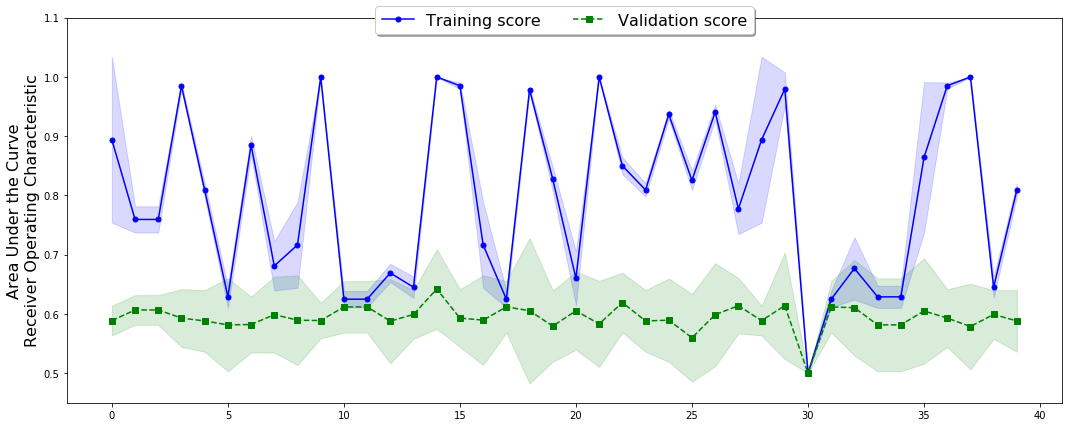

In [28]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(wlcx_gbm, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [29]:
for var_label in list(wlcx_gbm.filter(regex=estimator_name).columns):
    var = np.copy(wlcx_gbm[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({0.01: 8, 0.0187022129102427: 4, 2.9385583413682697: 3, 1.1899336546392285: 3, 2.477479308360377: 2, 4.928946966251375: 2, 3.4787921614831805: 2, 0.7482359177918816: 1, 2.5318279860661157: 1, 0.02697917749607161: 1, 2.675426827597976: 1, 0.16825033113721222: 1, 0.14814036390283866: 1, 1.7701122198752175: 1, 8.131549412115367: 1, 1.5767500387568825: 1, 3.959061952230552: 1, 7.652824562745987: 1, 2.2694104240831563: 1, 18.508863079113894: 1, 2.900966010619636: 1, 3.3979401723284326: 1, 6.179461425570652: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({107.0: 4, 135.0: 4, 119.0: 3, 159.0: 3, 5.0: 3, 46.0: 2, 216.0: 2, 61.0: 2, 37.0: 1, 117.0: 1, 210.0: 1, 116.0: 1, 370.0: 1, 96.0: 1, 95.0: 1, 214.0: 1, 480.0: 1, 393.0: 1, 100.0: 1, 92.0: 1, 291.0: 1, 312.0: 1, 394.0: 1, 49.0: 1, 80.0: 1})
---------------------

# Fisher score & XGBoost 

In [12]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'XGBoost'
fisher_boost_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

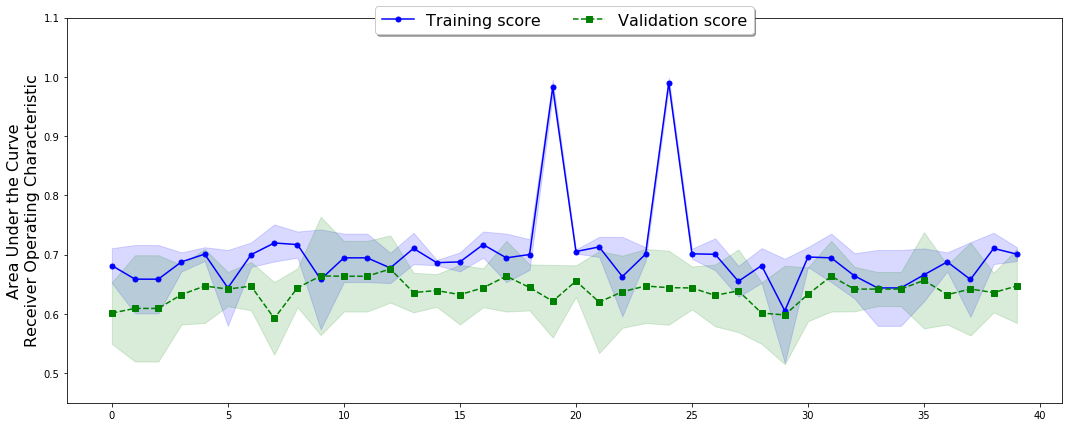

In [13]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_boost_results, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [14]:
print_params(fisher_boost_results, estimator_name)

learning_rate
------------------------------------------------------------
Counter({27.951962504688506: 4, 17.321114125795848: 3, 10.545092811546516: 3, 38.29386783913834: 3, 49.78110190209118: 2, 41.09989063107281: 2, 0.13140540213966287: 2, 21.60303266786385: 2, 0.01: 2, 46.0133137230783: 1, 16.727597456000414: 1, 47.53581277647997: 1, 35.65979869165742: 1, 30.39631850553473: 1, 23.249280238654947: 1, 12.19716060631814: 1, 25.83824434612605: 1, 4.0638941060852805: 1, 36.194705098959695: 1, 46.55865860917954: 1, 36.8872967449519: 1, 42.35229115911061: 1, 37.38482907274663: 1, 29.40038925342405: 1, 47.79532730454326: 1, 15.982323624601353: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({419.0: 4, 146.0: 3, 407.0: 3, 141.0: 3, 139.0: 2, 313.0: 2, 31.0: 2, 352.0: 2, 100.0: 2, 38.0: 1, 464.0: 1, 426.0: 1, 189.0: 1, 449.0: 1, 450.0: 1, 261.0: 1, 266.0: 1, 54.0: 1, 76.0: 1, 91.0: 1, 242.0: 1, 

# Chi Square & Light GBM

In [15]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'LightGBM'
chi2_gbm_results = results[results['experiment_id'] == f'{selector_name}_{estimator_name}']

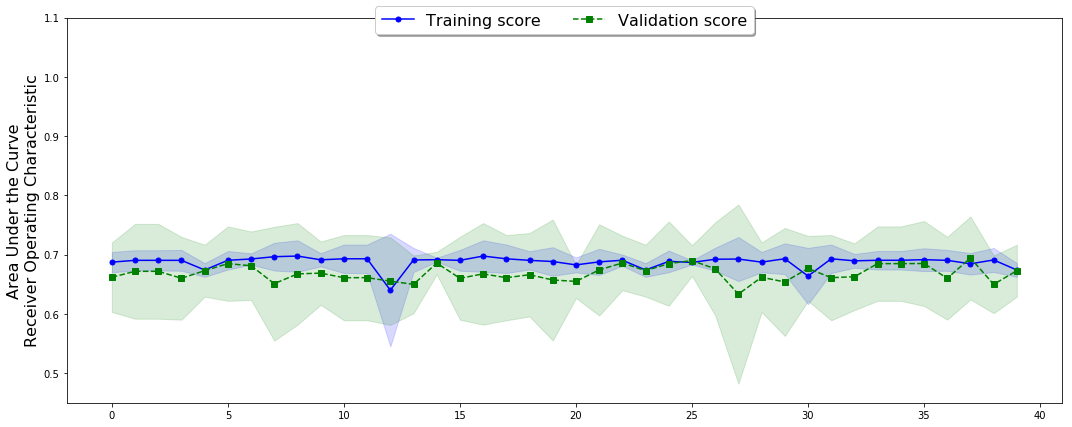

In [16]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(chi2_gbm_results, axis)

plt.ylim([0.45, 1.1])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [17]:
print_params(chi2_gbm_results, estimator_name)

learning_rate
------------------------------------------------------------
Counter({1.7663613540447818: 4, 7.254478095598498: 3, 45.9633329109978: 3, 12.59316761577934: 3, 4.697774493255396: 2, 0.9273493079565408: 2, 1.541975956345411: 2, 9.577224242575406: 2, 7.296996208562787: 1, 6.727164652508522: 1, 3.6996399111008453: 1, 48.51258070345726: 1, 6.995134589547305: 1, 4.69889870999134: 1, 0.2680131047766975: 1, 48.1059058138095: 1, 8.135861592663524: 1, 1.190161382216802: 1, 3.369518805641903: 1, 31.401440411576186: 1, 46.909177099247046: 1, 1.0698958881242804: 1, 4.5043955695546245: 1, 44.79511534463648: 1, 1.6514465463555297: 1, 37.98062647071491: 1, 1.1860176021730822: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({154.0: 4, 27.0: 3, 15.0: 3, 488.0: 3, 238.0: 3, 342.0: 2, 14.0: 2, 425.0: 2, 73.0: 2, 39.0: 1, 392.0: 1, 352.0: 1, 490.0: 1, 257.0: 1, 124.0: 1, 459.0: 1, 494.0: 1, 240.0: